Even though the CF is being tracked well - there's an issue with estimating the duration of the FM. Perhaps the way to do this is through frequency tracking in time?

In [1]:
import sys
sys.path.append('../measure_horseshoe_bat_calls/')

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [2]:
from measure_a_horseshoe_bat_call import *

In [3]:
import pywt as pywt

In [16]:
fs = 250000
fmdurn = 0.0025
call_durn = 0.05
call = make_one_CFcall(call_durn, fmdurn, 100000, fs, 'staplepin', fm_bandwidth=10000)
call *= 0.1
gap = int(0.005*fs)
call_w_noise = np.random.normal(0,10**-5/20,call.size+2*gap)
call_w_noise[gap:-gap] += call

fm1_startstop = [gap+1, gap+1+int(fmdurn*fs)]
fm2_startstop = [call_w_noise.size-gap-int(fmdurn*fs), call_w_noise.size-gap]
cf_startstop = [gap+int(fmdurn*fs),call_w_noise.size-gap-int(fmdurn*fs)]

../measure_horseshoe_bat_calls/measure_a_horseshoe_bat_call.py:204: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(t, freqs, polynomial_num)


In [17]:
%matplotlib notebook

<IPython.core.display.Javascript object>


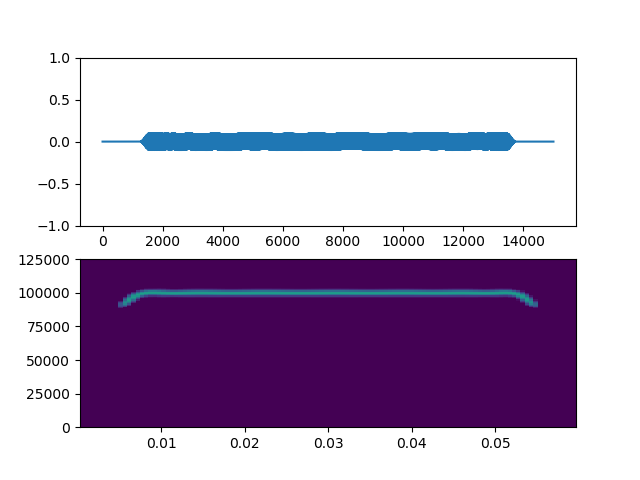

In [19]:
plt.figure()
plt.subplot(211)
plt.plot(call_w_noise)
plt.ylim(-1,1)
plt.subplot(212)
plt.specgram(call_w_noise, Fs=fs, vmax=-20, vmin=-100);

In [26]:
pywt.wavelist(kind='continuous')

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

In [32]:
coefs.shape

(4L, 15000L)

[101562.5         67708.33333333  50781.25        40625.
  33854.16666667]


<IPython.core.display.Javascript object>


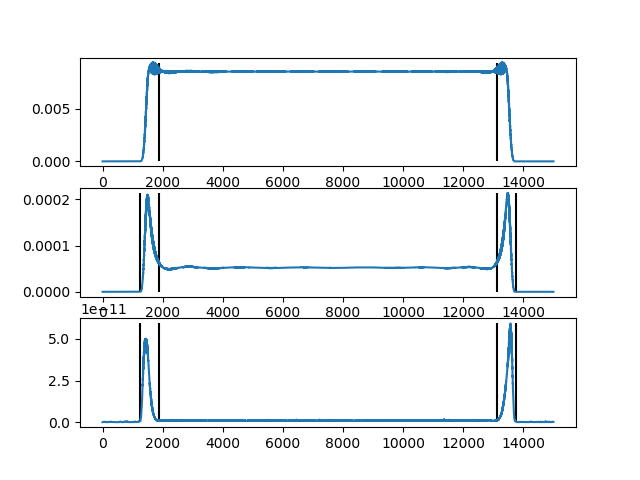

In [62]:
wavelet_type = pywt.ContinuousWavelet('morl')
[coefs, freqs] = pywt.cwt(call_w_noise, [2, 3, 4, 5,6], wavelet_type, 1.0/(fs))
print(freqs)
#plt.figure()
#plt.imshow(coefs, aspect='auto')

all_scales_rms = (np.apply_along_axis( moving_rms, 1, coefs , window_size=25))**2.0

plt.figure()
plt.subplot(311)
plt.plot(all_scales_rms[0,:])
plt.vlines(cf_startstop, 0, np.max(all_scales_rms[0]))
plt.subplot(312)
plt.plot(all_scales_rms[1,:]+all_scales_rms[2,:])
plt.vlines(np.concatenate((fm1_startstop, fm2_startstop)), 0, np.max(all_scales_rms[1,:]))
plt.subplot(313)
plt.plot(all_scales_rms[2,:])
plt.vlines(np.concatenate((fm1_startstop, fm2_startstop)), 0, np.max(all_scales_rms[2,:]))